# by Abhishek Thakur

# Evaluation metrics

If we talk about classification problems, the most common metrics used are:
<br>
- Accuracy
<br>
- Precision (P)
<br>
- Recall (R)
<br>
- F1 score (F1)
<br>
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC)
<br>
- Log loss
<br>
- Precision at k (P@k)
<br>
- Average precision at k (AP@k)
<br>
- Mean average precision at k (MAP@k)

When it comes to regression, the most commonly used evaluation metrics are:
<br>
- Mean absolute error (MAE)
<br>
- Mean squared error (MSE)
<br>
- Root mean squared error (RMSE)
<br>
- Root mean squared logarithmic error (RMSLE)
<br>
- Mean percentage error (MPE)
<br>
- Mean absolute percentage error (MAPE)
<br>
- R2

The first step is to divide the data described above into two equal sets of 100 images
each, i.e. training and validation set. In both the sets, we have 50 positive and 50
negative samples.
<br>
When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and f1.

**Accuracy:** It is one of the most straightforward metrics used in machine learning.
It defines how accurate your model is. For the problem described above, if you
build a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If
only 83 images are classified correctly, the accuracy of your model is 83% or 0.83.
Simple.

Python code for calculating accuracy is also quite simple.

In [1]:
def accuracy(y_true, y_pred):
    '''
    Function to calculate accuracy 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score
    '''
    
    # initialize a simple counter for correct predictions
    correct_counter = 0
    
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

We can also calculate accuracy using scikit-learn.

In [2]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1,l2)

0.625

In [3]:
accuracy(l1, l2) # its is our method

0.625

Now, let’s say we change the dataset a bit such that there are 180 chest x-ray images
which do not have pneumothorax and only 20 with pneumothorax. Even in this
case, we will create the training and validation sets with the same ratio of positive
to negative (pneumothorax to non- pneumothorax) targets. In each set, we have 90
non- pneumothorax and 10 pneumothorax images. If you say that all images in the
validation set are non-pneumothorax, what would your accuracy be? Let’s see; you
classified 90% of the images correctly. So, your accuracy is 90%.
<br>
But look at it one more time.
<br>
You didn’t even build a model and got an accuracy of 90%. That seems kind of
useless. If we look carefully, we will see that the dataset is skewed, i.e., the number
of samples in one class outnumber the number of samples in other class by a lot. In
these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it
is not representative of the data. So, you might get high accuracy, but your model
will probably not perform that well when it comes to real-world samples, and you
won’t be able to explain to your managers why.
<br>
In these cases, it’s better to look at other metrics such as **precision.**
<br>
Before learning about precision, we need to know a few terms. Here we have
assumed that chest x-ray images with pneumothorax are positive class (1) and
without pneumothorax are negative class (0).
<br>
**True positive (TP):** Given an image, if your model predicts the image has
pneumothorax, and the actual target for that image has pneumothorax, it is
considered a true positive.
<br>
**True negative (TN):** Given an image, if your model predicts that the image does not
have pneumothorax and the actual target says that it is a non-pneumothorax image,
it is considered a true negative.
<br>
In simple words, if your model correctly predicts positive class, it is true positive,
and if your model accurately predicts negative class, it is a true negative.
<br>
**False positive (FP):** Given an image, if your model predicts pneumothorax and the
actual target for that image is non- pneumothorax, it a false positive.
<br>
**False negative (FN):** Given an image, if your model predicts non-pneumothorax
and the actual target for that image is pneumothorax, it is a false negative.
<br>
In simple words, if your model incorrectly (or falsely) predicts positive class, it is
a false positive. If your model incorrectly (or falsely) predicts negative class, it is a
false negative.

In [4]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true positives 
    """
    
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp


def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp


def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn


The way I have implemented these here is quite simple and works only for binary
classification. Let’s check these functions.

In [5]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [6]:
true_positive(l1, l2)

2

In [7]:
false_positive(l1, l2)

1

In [8]:
false_negative(l1, l2)

2

In [9]:
true_negative(l1, l2)

3

If we have to define accuracy using the terms described above, we can write:
<br>
**Accuracy Score** = (TP + TN) / (TP + TN + FP + FN)

We can now quickly implement accuracy score using TP, TN, FP and FN in python.
Let’s call it accuracy_v2.

In [10]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

We can quickly check the correctness of this function by comparing it to our
previous implementation and scikit-learn version.

In [11]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [12]:
accuracy(l1, l2)

0.625

In [13]:
accuracy_v2(l1, l2)

0.625

In [14]:
metrics.accuracy_score(l1, l2)

0.625

**Precision** = TP / (TP + FP)

In [15]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [16]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
precision(l1, l2)

0.6666666666666666

**Recall** = TP / (TP + FN)

In [17]:
def recall(y_true, y_pred): 
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [18]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
recall(l1, l2)

0.5

**For a “good” model, our precision and recall values should be high.**

**F1 score is a metric that combines both precision and recall.**
<br>
It is defined as a simple
weighted average (harmonic mean) of precision and recall.
<br>
**F1 = 2PR / (P + R)**
<br>
i.e **F1 = 2TP / (2TP + FP + FN)**

In [19]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [20]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [21]:
f1(y_true, y_pred)

0.5714285714285715

In [22]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

Instead of looking at precision and recall individually, you can also just look at F1
score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1,
and a perfect prediction model has an F1 of 1. When dealing with datasets that have
skewed targets, we should look at F1 (or precision and recall) instead of accuracy.

The first one is **TPR or True Positive Rate or sensitivity.**, which is the same as recall.
**TPR = TP / (TP + FN)**

In [23]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

**FPR or False Positive Rate**, which is defined as:
**FPR = FP / (TN + FP)**
<br>
**1 - FPR** is known as **specificity or True Negative Rate or TNR.**

Area Under ROC Curve or **Area Under Curve** or
just simply **AUC**. There are many ways to calculate the area under the ROC curve.
For this particular purpose, we will stick to the fantastic implementation by scikitlearn.
<br>
**Receiver Operating Characteristic (ROC)**

In [24]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1.

- **AUC = 1** implies you have a perfect model.
<br>
- **AUC = 0** implies that your model is very bad (or very good!).
<br>
- **AUC = 0.5** implies that your predictions are random. 

**AUC is a widely used metric for skewed binary classification tasks in the industry**

In case
of a binary classification problem, we define log loss as:
<br>
**Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )**

**we use weighted f1 metric for multi-class problems**

In binary or multi-class classification, it is also quite popular to take a look at
**confusion matrix**.

**Confusion matrix** gives an easy way to calculate different metrics that we have
discussed before.

Text(0.5, 48.5, 'Predicted Labels')

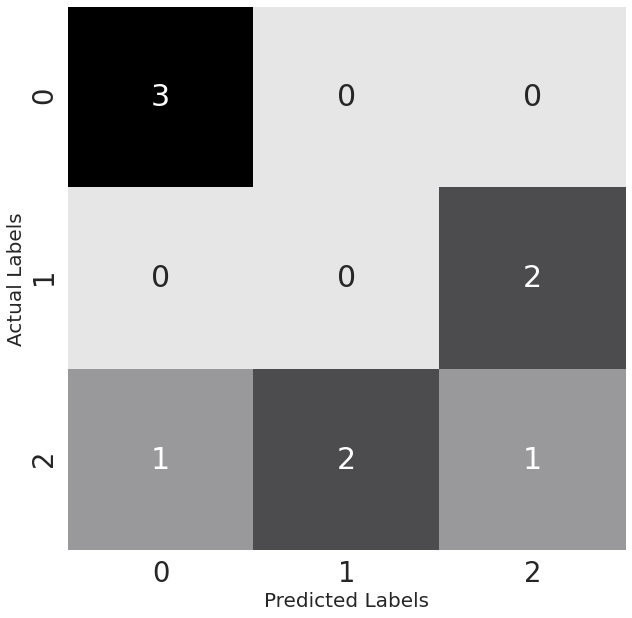

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
                            as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)           

metrics for **multi-label classification problems** are
<br>
- Precision at k (P@k)
<br>
- Average precision at k (AP@k)
<br>
- Mean average precision at k (MAP@k)
<br>
- Log loss

In [26]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """
    
    # if k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    
    # convert predictions to set
    pred_set = set(y_pred)
    
    # convert actual values to set
    true_set = set(y_true)
    
    # find common values
    common_values = pred_set.intersection(true_set)
    
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

Now, we have **average precision at k or AP@k**. AP@k is calculated using P@k.
For example, if we have to calculate AP@3, we calculate P@1, P@2 and P@3 and
then divide the sum by 3.

In [27]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes\
    :return: average precision at a given value k
    """
    
    # initialize p@k list of values
    pk_values = []
    
    # loop over all k. from 1 to k+1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
        
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)
        

In [28]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(
            f'''
            y_true={y_true[i]},
            y_pred={y_pred[i]},
            AP@{j}={apk(y_true[i], y_pred[i], k=j)}
            '''
            )


            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@1=0.0
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@2=0.25
            

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@3=0.38888888888888884
            

            y_true=[0, 2],
            y_pred=[1],
            AP@1=0.0
            

            y_true=[0, 2],
            y_pred=[1],
            AP@2=0.0
            

            y_true=[0, 2],
            y_pred=[1],
            AP@3=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@1=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@2=0.0
            

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@3=0.0
            

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@1=1.0
            

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@2=

In machine learning,
we are interested in all samples, and that’s why we have **mean average precision
at k or MAP@k. MAP@k** is just an average of AP@k

In [29]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    
    # initialize empty list for apk values    
    apk_values = []
    
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
    
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [30]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [31]:
mapk(y_true, y_pred, k=2)

0.375

In [32]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [33]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

P@k, AP@k and MAP@k all range from 0 to 1 with 1 being the best.

**The most common metric in regression** is error. **Error** is simple and very easy to
understand.
<br>
**Error = True Value – Predicted Value**
<br>
**Absolute error** is just absolute of the above.
Absolute Error = Abs ( True Value – Predicted Value )
<br>
Then we have **mean absolute error (MAE)**. It’s just mean of all absolute errors.

In [34]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    
    # initialize error at 0
    error = 0
    
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error
        # and add to error
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

Similarly, we have squared error and **mean squared error (MSE).**
<br>
**Squared Error = ( True Value – Predicted Value )2**

In [35]:
def mean_squared_error(y_true, y_pred):
    """
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """
    
    # initialize error at 0
    error = 0
    
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2    
    # return mean error
    return error / len(y_true)

MSE and **RMSE (root mean squared error)** are the most popular metrics used in
evaluating regression models.
<br>
**RMSE = SQRT ( MSE )**

Another type of error in same class is **squared logarithmic error**. Some people
call it **SLE**, and when we take mean of this error across all samples, it is known as
**MSLE (mean squared logarithmic error)**

In [36]:
import numpy as np
def mean_squared_log_error(y_true, y_pred):
    """
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmic error    
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

**Root mean squared logarithmic error** is just a square root of this. It is also known
as **RMSLE.**
<br>
Then we have the percentage error:
<br>
**Percentage Error = ( ( True Value – Predicted Value ) / True Value ) * 100**

In [37]:
def mean_percentage_error(y_true, y_pred):
    """
    This function calculates mpe
    :param y_true: list of real numbers, true values\
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

And an absolute version of the same (and more common version) is known as **mean
absolute percentage error or MAPE**.

In [38]:
import numpy as np

def mean_abs_percentage_error(y_true, y_pred):
    """
    This function calculates MAPE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

**The best thing about regression is that there are only a few most popular metrics
that can be applied to almost every regression problem.**

Let’s talk about another regression metric known as **R2 (R-squared)**, also known
as the **coefficient of determination**.

In simple words, R-squared says how good your model fits the data. R-squared
closer to 1.0 says that the model fits the data quite well, whereas closer 0 means
that model isn’t that good. R-squared can also be negative when the model just
makes absurd(total nonsense) predictions.

In [39]:
import numpy as np
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """
    
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    
    # initialize numerator with 0
    numerator = 0

    # initialize denominator with 0
    denominator = 0


    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
        
    # calculate the ratio
    ratio = numerator / denominator
    # return 1 - ratio
    return 1 - ratio

One of them which is quite widely used is **quadratic weighted kappa,** also known
as **QWK**. It is also known as **Cohen’s kappa**. QWK measures the “agreement”
between two “ratings”. The ratings can be any real numbers in 0 to N. And
predictions are also in the same range. An agreement can be defined as how close
these ratings are to each other. So, it’s suitable for a classification problem with N
different categories/classes. If the agreement is high, the score is closer towards 1.0.
In the case of low agreement, the score is close to 0.

In [40]:
from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

0.33333333333333337

In [41]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

You can see that even though accuracy is high, QWK is less. A QWK greater than
0.85 is considered to be very good!

An important metric is **Matthew’s Correlation Coefficient (MCC)**.
<br>
MCC ranges
from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random
prediction. The formula for MCC is quite simple.

In [42]:
def mcc(y_true, y_pred):
    """
    This function calculates Matthew's Correlation Coefficient
    for binary classification.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    numerator = (tp * tn) - (fp * fn)
    denominator = (
        (tp + fp) *
        (fn + tn) *
        (fp + tn) *
        (tp + fn)
    )
    
    denominator = denominator ** 0.5
    return numerator/denominator

These are the metrics that can help you get started and will apply to almost every
machine learning problem.

One thing to keep in mind is that to evaluate un-supervised methods, for example,
some kind of clustering, it’s better to create or manually label the test set and keep
it separate from everything that is going on in your modelling part. When you are
done with clustering, you can evaluate the performance on the test set simply by
using any of the supervised learning metrics.

Once we understand what metric to use for a given problem, we can start looking
more deeply into our models for improvements.